<a href="https://colab.research.google.com/github/Grishka3002/-/blob/main/lab4/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Train.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [ ]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

In [3]:
df.info()#пустых данных нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


<Axes: >

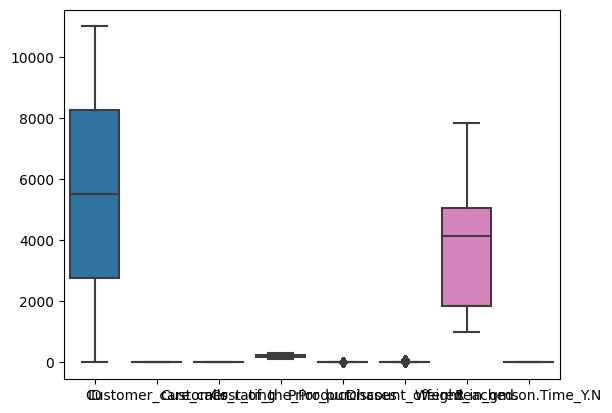

In [4]:
#выбрал эти данные так как остальные относятся не к товару а к покупателю ( а Product_importance так как потом я буду их как кластеры считать)
df_clust = df.drop(columns=['ID','Gender','Reached.on.Time_Y.N','Customer_care_calls','Customer_rating','Prior_purchases','Product_importance']).copy()
sns.boxplot(df)# выбросов нет

In [ ]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""

<Axes: >

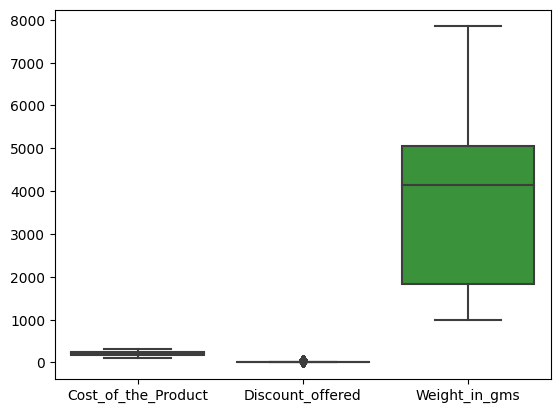

In [5]:
sns.boxplot(df_clust)# выбросов нет

<Axes: >

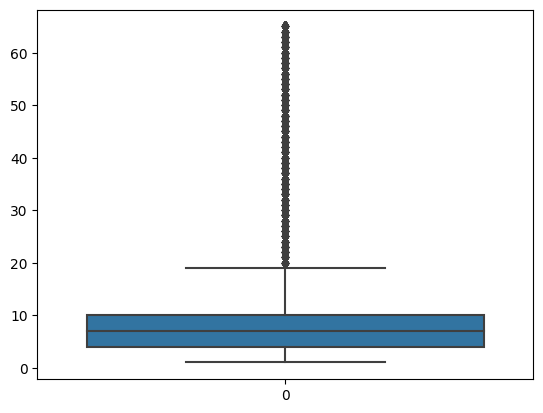

In [6]:
sns.boxplot(df_clust['Discount_offered'])# выбросы есть и для их удаления я воспользуюсь квартилями

In [7]:
  q1 = df_clust['Discount_offered'].quantile(0.25)
  q3 = df_clust['Discount_offered'].quantile(0.75)
  minimum = q1-1.5*(q3-q1)
  maximum = q3+1.5*(q3-q1)
  df_clust = df_clust[(df_clust['Discount_offered'] >= minimum) & (df_clust['Discount_offered'] <= maximum)]
  df_clust

,Warehouse_block,Mode_of_Shipment,Cost_of_the_Product,Discount_offered,Weight_in_gms
3,B,Flight,176,10,1177
5,F,Flight,162,12,1417
6,D,Flight,250,3,2371
8,A,Flight,150,11,1861
10,C,Flight,189,12,2888
...,...,...,...,...,...
10994,A,Ship,252,1,1538
10995,B,Ship,232,6,1247
10996,C,Ship,242,4,1155
10997,F,Ship,223,2,1210


In [8]:
df_clust.describe()

,Cost_of_the_Product,Discount_offered,Weight_in_gms
count,8790.000000,8790.000000,8790.000000
mean,213.739590,5.975085,3951.409556
std,48.075808,3.523850,1620.529287
min,96.000000,1.000000,1001.000000
25%,173.000000,3.000000,1949.250000
50%,220.000000,6.000000,4512.000000
75%,254.000000,8.000000,5243.750000
max,310.000000,19.000000,6102.000000


<ipython-input-9-f86f6f37dbe0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clust['Discount_offered'], hist=True, kde=False,


<Axes: xlabel='Discount_offered'>

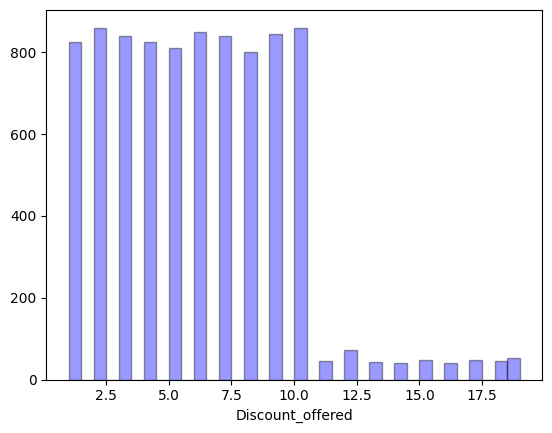

In [9]:
sns.distplot(df_clust['Discount_offered'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

<ipython-input-10-3d6c89529ff1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clust['Cost_of_the_Product'], hist=True, kde=False,


<Axes: xlabel='Cost_of_the_Product'>

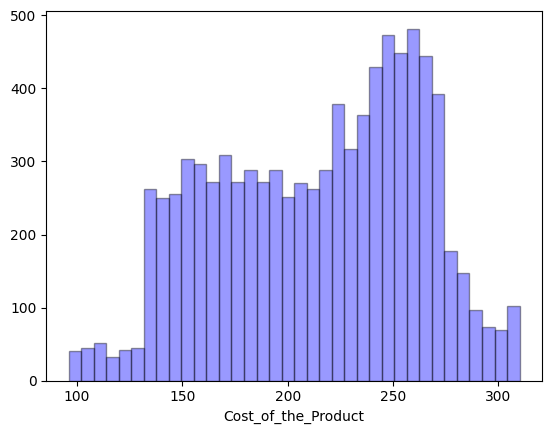

In [10]:
sns.distplot(df_clust['Cost_of_the_Product'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

<ipython-input-11-ee4813ed112e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clust['Weight_in_gms'], hist=True, kde=False,


<Axes: xlabel='Weight_in_gms'>

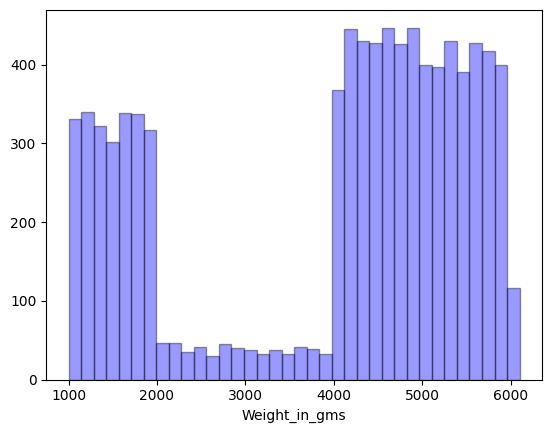

In [11]:
sns.distplot(df_clust['Weight_in_gms'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [12]:
min_max_scaler = MinMaxScaler()
min_max_scal = min_max_scaler.fit_transform(df_clust[['Cost_of_the_Product','Weight_in_gms','Discount_offered']])
df_clust[['Cost_of_the_Product','Weight_in_gms','Discount_offered']] = min_max_scal
df_clust.Cost_of_the_Product.unique()

array([0.37383178, 0.30841121, 0.71962617, 0.25233645, 0.43457944,
       0.47663551, 0.21962617, 0.6682243 , 0.28037383, 0.53738318,
       0.64485981, 0.39719626, 0.61214953, 0.53271028, 0.43925234,
       0.5       , 0.06074766, 0.28971963, 0.63084112, 0.42523364,
       0.62616822, 0.6635514 , 0.59345794, 0.1682243 , 0.47196262,
       0.85046729, 0.88785047, 0.36915888, 0.57476636, 0.24766355,
       0.81775701, 0.22429907, 0.57009346, 0.78037383, 0.50934579,
       0.58878505, 0.48598131, 0.38785047, 0.70560748, 0.3364486 ,
       0.28504673, 0.6588785 , 0.57943925, 0.8317757 , 0.3271028 ,
       0.41588785, 0.44859813, 0.74299065, 0.30373832, 0.1588785 ,
       0.20560748, 0.18224299, 0.18691589, 0.20093458, 0.24299065,
       0.14485981, 0.09345794, 0.31775701, 0.1728972 , 0.21495327,
       0.22897196, 0.29906542, 0.23831776, 0.78504673, 0.52803738,
       0.81308411, 0.40654206, 0.31308411, 0.32242991, 0.59813084,
       0.21028037, 0.49065421, 0.77102804, 0.42990654, 0.79906

In [13]:
df_clust = pd.get_dummies(df_clust,columns = ['Warehouse_block','Mode_of_Shipment'])
df_clust

,Cost_of_the_Product,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
3,0.373832,0.500000,0.034503,0,1,0,0,0,1,0,0
5,0.308411,0.611111,0.081553,0,0,0,0,1,1,0,0
6,0.719626,0.111111,0.268575,0,0,0,1,0,1,0,0
8,0.252336,0.555556,0.168594,1,0,0,0,0,1,0,0
10,0.434579,0.611111,0.369927,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10994,0.728972,0.000000,0.105273,1,0,0,0,0,0,0,1
10995,0.635514,0.277778,0.048226,0,1,0,0,0,0,0,1
10996,0.682243,0.166667,0.030190,0,0,1,0,0,0,0,1
10997,0.593458,0.055556,0.040972,0,0,0,0,1,0,0,1


In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score

Оптимальное число кластеров Calinski Harabasz Score 2, с баллом 611.4124064500052
Оптимальное число кластеров Silhouette Score 2, с баллом 0.09377101737460085
Оптимальное число кластеров Davies Bouldin Score 2, с баллом 3.439534000230048


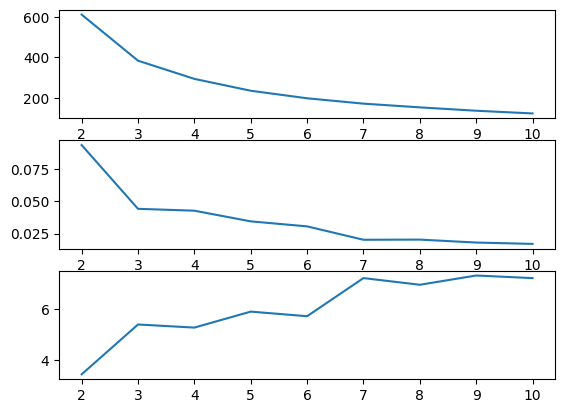

In [15]:

# your_code here
score_1 = []
score_2 = []
score_3 = []
for k in range(2,11):
  kmeans = KMeans(n_clusters= k,n_init = 10,random_state = 42)
  kmeans.fit(min_max_scal)
  score_1.append(calinski_harabasz_score(df_clust,kmeans.labels_))
  score_2.append(silhouette_score(df_clust,kmeans.labels_))
  score_3.append(davies_bouldin_score(df_clust,kmeans.labels_))
print(f"Оптимальное число кластеров Calinski Harabasz Score {score_1.index(max(score_1)) + 2}, с баллом {max(score_1)}")
print(f"Оптимальное число кластеров Silhouette Score {score_2.index(max(score_2)) + 2}, с баллом {max(score_2)}")
print(f"Оптимальное число кластеров Davies Bouldin Score {score_3.index(min(score_3)) + 2}, с баллом {min(score_3)}")
fig, axs = plt.subplots(nrows= 3 , ncols= 1 )
axs[0].plot(range(2, 11), score_1)
axs[1].plot(range(2, 11), score_2)
axs[2].plot(range(2, 11), score_3)
# plt.show()

In [ ]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

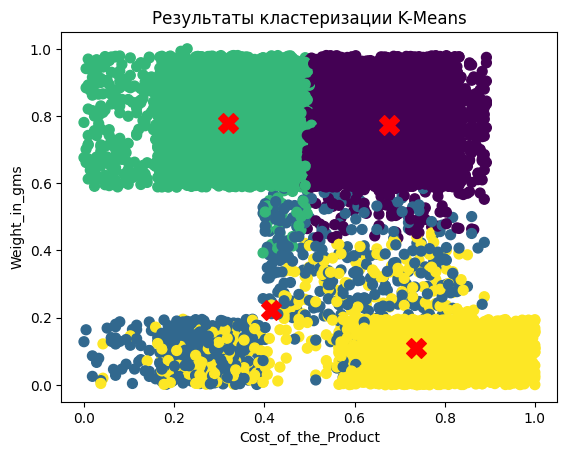

In [16]:
kmeans = KMeans(n_clusters= 4,n_init = 10,random_state = 42)
kmeans.fit(min_max_scal)


cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
plt.scatter(df_clust['Cost_of_the_Product'], df_clust['Weight_in_gms'], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('Cost_of_the_Product')
plt.ylabel('Weight_in_gms')
plt.title('Результаты кластеризации K-Means')
plt.show()

In [23]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score
import numpy as np

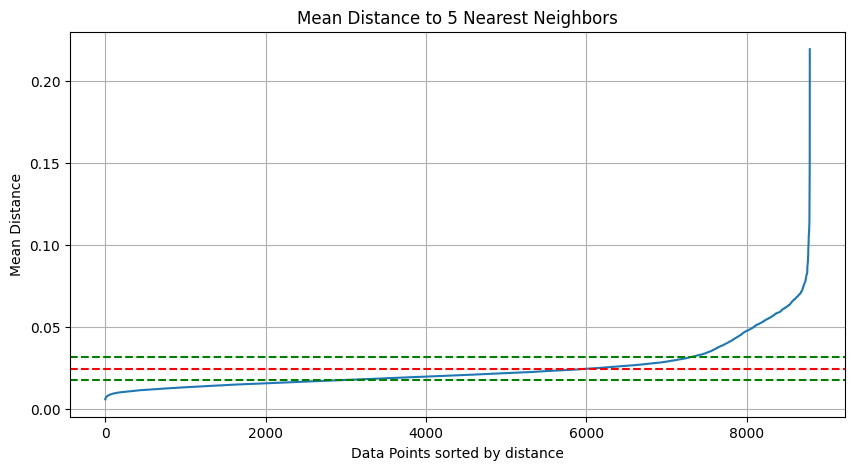

Оптимальный EPS = 0.024770471112966964


In [24]:
# Создаем пустой список, в который будем добавлять средние расстояния
neighbours = []

# Проходимся по каждой строке в исходном DataFrame
for i, v1 in enumerate(min_max_scal):
    # Вычисляем расстояния от текущей точки до всех остальных
    distances = [np.linalg.norm(v1- v2) for j, v2 in enumerate(min_max_scal) if i != j]
    # Вычисляем среднее расстояние до 5 ближайших соседей
    neighbours.append(np.mean(sorted(distances)[:5]))

# Сортируем средние расстояния
neighbours = sorted(neighbours)

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(range(len(neighbours)), neighbours)
plt.title('Mean Distance to 5 Nearest Neighbors')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Mean Distance')
plt.grid(True)

# Добавляем линиюю среднего, которая показываем примерно оптимальный EPS
plt.axhline(y=np.mean(neighbours) + np.std(neighbours) / 2, color='g', linestyle='--')
plt.axhline(y=np.mean(neighbours), color='r', linestyle='--')
plt.axhline(y=np.mean(neighbours) - np.std(neighbours) / 2, color='g', linestyle='--')
# зеленым отмечаем ПРИМЕРНУЮ графницу оптимального EPS, но это не является стандартным методом, это скорее интуитвивная картинка
# основной смысл в том, что мы ищем то значение, в котором изменение значения по графику становится "стабильным"
plt.show()
print(f'Оптимальный EPS = {np.mean(neighbours)}')
#я подождал минут 5 и понял что это надолго поэтому данные eps буду брать как у вас в примере

In [ ]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

[0]


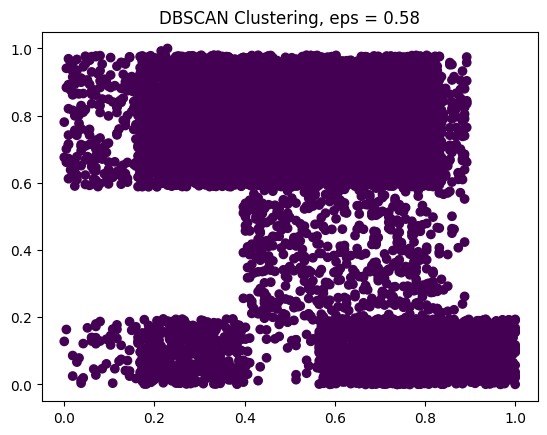

[0]


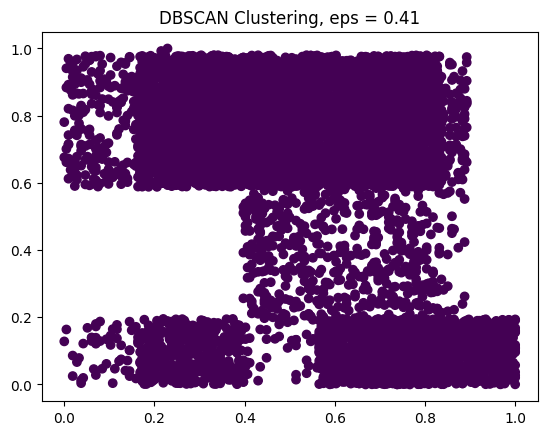

[0]


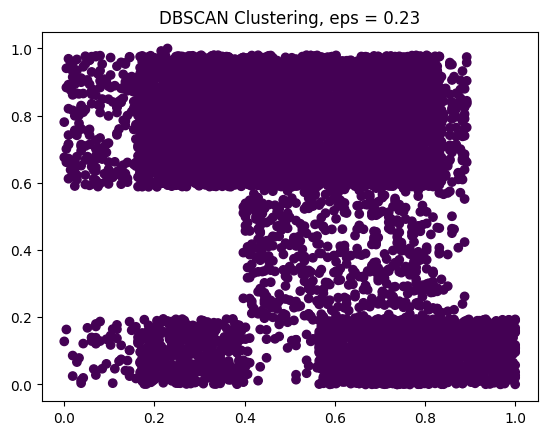

[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 24

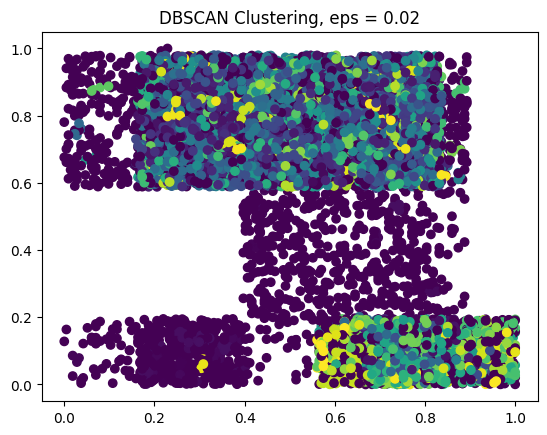

In [25]:
# Создаем объект PCA и снижаем размерность до 2 компонент, чтобы визуализировать на двумерном графике

for eps in [0.58,0.41,0.23,0.02]:
  # Инициализация и обучение модели DBSCAN
  dbscan = DBSCAN(eps=eps, min_samples=3)
  dbscan.fit(min_max_scal)
  labels_db = dbscan.labels_
  print(np.unique(labels_db))
  # Визуализация результатов, темные точки - выбросы
  plt.scatter(df_clust['Cost_of_the_Product'], df_clust['Weight_in_gms'], c=labels_db, cmap='viridis')
  plt.title(f'DBSCAN Clustering, eps = {round(eps, 2)}')
  plt.show()

In [27]:
"""
Здесь иерархическая кластеризация и метрики
"""
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [28]:
score_1 = []
score_2 = []
score_3 = []
for k in range(2,11):
  cluster_model = AgglomerativeClustering(n_clusters=k,linkage='average')

  clusters = cluster_model.fit(min_max_scal)

  score_2.append(silhouette_score(min_max_scal,kmeans.labels_,metric='euclidean'))
print(f"Оптимальное число кластеров Silhouette Score {score_2.index(max(score_2)) + 2}, с баллом {max(score_2)}")

Оптимальное число кластеров Silhouette Score 2, с баллом 0.3660299363677805


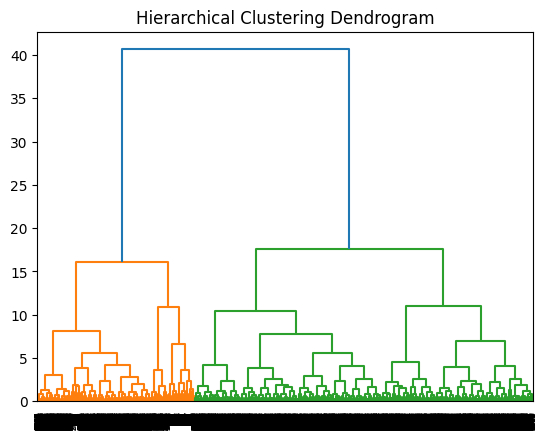

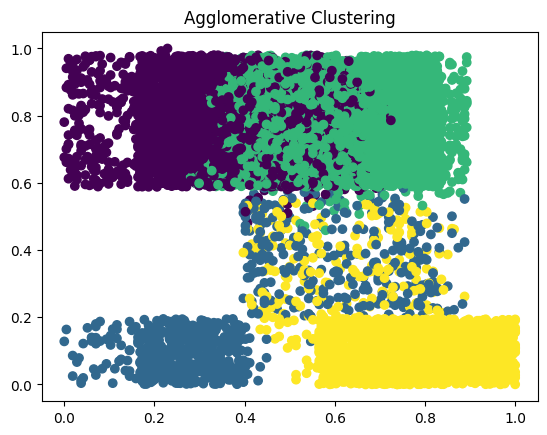

In [29]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(min_max_scal)
linkage_matrix = hierarchy.linkage(min_max_scal, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()
# Визуализация результатов кластеризации
plt.scatter(df_clust['Cost_of_the_Product'], df_clust['Weight_in_gms'], c=agg_clustering.labels_, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

In [30]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=1f97997836e05ea70994c85d9e3882d75e78728481c3c49a8723b369340237c6
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
 

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [33]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



'\nНа отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма\n\nfrom ydata_profiling import ProfileReport\n\nProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)\n\n'

In [34]:
# your_code here
df['kmeans_cluster'] = cluster_labels
df['dbscan_cluster'] = labels_db
df

ValueError: Length of values (8790) does not match length of index (10999)